# Making a 1D GAN from scracth with Keras

This is a first test at making a GAN using Keras.

Tutorial Source: https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/

play with a 2D GAN (playground): https://poloclub.github.io/ganlab/



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## defining our function:
we will choose a simple function to approximate, f(x) =x^2

In [2]:
def func(x):
    return x**3

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00]


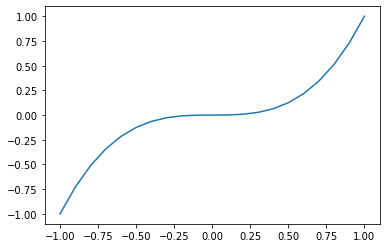

In [3]:
inputs = np.arange(-1,1.1,0.1)
print(inputs)

plt.plot(inputs,[func(inp) for inp in inputs])

## Sampling some points from our distribution

The goal of a GAN is to approximate a certain data distribution. The discriminator needs to be able to distinguish between data from the distribution and data that is not contained in the real distribution while the generator needs to approximate the distribution in order to fool the discriminator.

Here, we will sample some points from our distribution. This will serve as our 'real' data. During training, we will show our discriminator data from this sampling (labeled as True) and data from the generator (labeled as false).

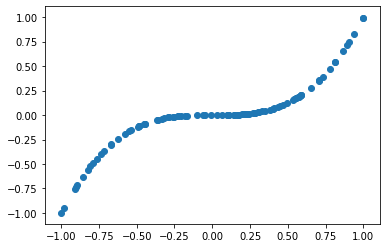

In [4]:
n_samples = 100

#generates n samples between -1 and 1
min_range = -1
max_range= 1

range_delta = abs(max_range-min_range)

X = np.random.rand(n_samples)*range_delta - abs(min_range)
#note, y here represents a feature of the data, not the label (i.e. real/fake data)
y = np.array([func(x) for x in X])

X = X.reshape(n_samples,1)
y = y.reshape(n_samples,1)


data = np.hstack((X,y))

plt.scatter(X,y)



## Building our discriminator model

Now that we have some data, we can move onto building the discriminator model. Essentially, the problem that we have to solve is a binary classification problem. We just need to know wether or not the data point belongs to the data distribution. In this exmaple, we will be using a FFNN with a single hidden layer since we are not trying to model particularly complicated data. we define our inputs and outputs as so:

    Inputs : data points that we build earlier (dim=2)
    Output : binary classification, likelyhood of the sample being real or fake

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model


def make_discriminator(input_dims=2):
    model =Sequential()
    model.add(Dense(25,activation='relu', kernel_initializer='he_uniform', input_dim= input_dims ))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


Using TensorFlow backend.


In [6]:
model = make_discriminator()
model.summary()

W0727 23:27:19.816524 140424508475200 deprecation_wrapper.py:119] From /home/antoine/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0727 23:27:19.855808 140424508475200 deprecation_wrapper.py:119] From /home/antoine/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 23:27:19.866048 140424508475200 deprecation_wrapper.py:119] From /home/antoine/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0727 23:27:19.894444 140424508475200 deprecation_wrapper.py:119] From /home/antoine/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0727 23:27:19.9

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [7]:
def generate_real_samples(n):
    min_range = -1
    max_range= 1

    range_delta = abs(max_range-min_range)

    x1 = min_range + np.random.rand(n)*range_delta 
    #note, y here represents a feature of the data, not the label (i.e. real/fake data)
    x2 = np.array([func(x) for x in x1])

    x1 = x1.reshape(n,1)
    x2 = x2.reshape(n,1)


    X = np.hstack((x1,x2))
    y = np.ones((n,1))
    
    return X,y
    
    
def generate_fake_samples(n):
    #defining a random multivariate gaussian
    x1 = -1 + np.random.randn(n) * 2
    x2 = -1 + np.random.randn(n) * 2
    
    x1 = x1.reshape(n,1)
    x2 = x2.reshape(n,1)
    
    X = np.hstack((x1,x2))

    y = np.zeros((n,1))
    
    return X,y

In [8]:
def train_discriminator(model,n_epochs=1000,n_batch=128):
    #we split batch in 2 to show both real and fake samples
    half_batch= int(n_batch/2)
    
    for epoch in range(n_epochs):
        #train on real data
        X_real,y_real = generate_real_samples(half_batch)
        model.train_on_batch(X_real,y_real)
        
        #train on fake data
        X_fake,y_fake = generate_fake_samples(half_batch)
        model.train_on_batch(X_fake,y_fake)
        
        _,acc_real = model.evaluate(X_real,y_real,verbose=0)
        _,acc_fake = model.evaluate(X_fake,y_fake,verbose=0)
        
        mean_acc = (acc_real+ acc_fake) /2
        
        print("epoch",epoch,"real accuracy",acc_real,"fake accuracy",acc_fake,"\nmean accuracy:",mean_acc)
        print()

In [9]:
model = make_discriminator()
train_discriminator(model)

W0727 23:27:20.171102 140424508475200 deprecation_wrapper.py:119] From /home/antoine/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



epoch 0 real accuracy 0.484375 fake accuracy 0.734375 
mean accuracy: 0.609375

epoch 1 real accuracy 0.5 fake accuracy 0.75 
mean accuracy: 0.625

epoch 2 real accuracy 0.515625 fake accuracy 0.6875 
mean accuracy: 0.6015625

epoch 3 real accuracy 0.46875 fake accuracy 0.71875 
mean accuracy: 0.59375

epoch 4 real accuracy 0.421875 fake accuracy 0.734375 
mean accuracy: 0.578125

epoch 5 real accuracy 0.5 fake accuracy 0.796875 
mean accuracy: 0.6484375

epoch 6 real accuracy 0.53125 fake accuracy 0.78125 
mean accuracy: 0.65625

epoch 7 real accuracy 0.578125 fake accuracy 0.84375 
mean accuracy: 0.7109375

epoch 8 real accuracy 0.46875 fake accuracy 0.78125 
mean accuracy: 0.625

epoch 9 real accuracy 0.4375 fake accuracy 0.734375 
mean accuracy: 0.5859375

epoch 10 real accuracy 0.59375 fake accuracy 0.84375 
mean accuracy: 0.71875

epoch 11 real accuracy 0.484375 fake accuracy 0.8125 
mean accuracy: 0.6484375

epoch 12 real accuracy 0.390625 fake accuracy 0.78125 
mean accuracy: 0

epoch 144 real accuracy 0.796875 fake accuracy 0.9375 
mean accuracy: 0.8671875

epoch 145 real accuracy 0.71875 fake accuracy 0.9375 
mean accuracy: 0.828125

epoch 146 real accuracy 0.734375 fake accuracy 0.875 
mean accuracy: 0.8046875

epoch 147 real accuracy 0.796875 fake accuracy 0.953125 
mean accuracy: 0.875

epoch 148 real accuracy 0.90625 fake accuracy 0.921875 
mean accuracy: 0.9140625

epoch 149 real accuracy 0.796875 fake accuracy 0.921875 
mean accuracy: 0.859375

epoch 150 real accuracy 0.75 fake accuracy 0.90625 
mean accuracy: 0.828125

epoch 151 real accuracy 0.765625 fake accuracy 0.890625 
mean accuracy: 0.828125

epoch 152 real accuracy 0.75 fake accuracy 0.921875 
mean accuracy: 0.8359375

epoch 153 real accuracy 0.734375 fake accuracy 0.953125 
mean accuracy: 0.84375

epoch 154 real accuracy 0.8125 fake accuracy 0.8125 
mean accuracy: 0.8125

epoch 155 real accuracy 0.828125 fake accuracy 0.9375 
mean accuracy: 0.8828125

epoch 156 real accuracy 0.859375 fake acc

epoch 296 real accuracy 0.890625 fake accuracy 0.796875 
mean accuracy: 0.84375

epoch 297 real accuracy 0.90625 fake accuracy 0.90625 
mean accuracy: 0.90625

epoch 298 real accuracy 0.875 fake accuracy 0.953125 
mean accuracy: 0.9140625

epoch 299 real accuracy 0.9375 fake accuracy 0.875 
mean accuracy: 0.90625

epoch 300 real accuracy 0.953125 fake accuracy 0.90625 
mean accuracy: 0.9296875

epoch 301 real accuracy 0.921875 fake accuracy 0.921875 
mean accuracy: 0.921875

epoch 302 real accuracy 0.921875 fake accuracy 0.859375 
mean accuracy: 0.890625

epoch 303 real accuracy 0.9375 fake accuracy 0.90625 
mean accuracy: 0.921875

epoch 304 real accuracy 0.875 fake accuracy 0.921875 
mean accuracy: 0.8984375

epoch 305 real accuracy 0.984375 fake accuracy 0.953125 
mean accuracy: 0.96875

epoch 306 real accuracy 0.921875 fake accuracy 0.890625 
mean accuracy: 0.90625

epoch 307 real accuracy 0.90625 fake accuracy 0.890625 
mean accuracy: 0.8984375

epoch 308 real accuracy 1.0 fake ac

epoch 428 real accuracy 0.984375 fake accuracy 0.90625 
mean accuracy: 0.9453125

epoch 429 real accuracy 0.984375 fake accuracy 0.90625 
mean accuracy: 0.9453125

epoch 430 real accuracy 0.96875 fake accuracy 0.84375 
mean accuracy: 0.90625

epoch 431 real accuracy 0.953125 fake accuracy 0.84375 
mean accuracy: 0.8984375

epoch 432 real accuracy 0.984375 fake accuracy 0.859375 
mean accuracy: 0.921875

epoch 433 real accuracy 0.9375 fake accuracy 0.96875 
mean accuracy: 0.953125

epoch 434 real accuracy 0.984375 fake accuracy 0.8125 
mean accuracy: 0.8984375

epoch 435 real accuracy 0.953125 fake accuracy 0.9375 
mean accuracy: 0.9453125

epoch 436 real accuracy 1.0 fake accuracy 0.84375 
mean accuracy: 0.921875

epoch 437 real accuracy 0.984375 fake accuracy 0.96875 
mean accuracy: 0.9765625

epoch 438 real accuracy 1.0 fake accuracy 0.890625 
mean accuracy: 0.9453125

epoch 439 real accuracy 0.953125 fake accuracy 0.875 
mean accuracy: 0.9140625

epoch 440 real accuracy 0.984375 fak

epoch 559 real accuracy 0.984375 fake accuracy 0.90625 
mean accuracy: 0.9453125

epoch 560 real accuracy 1.0 fake accuracy 0.890625 
mean accuracy: 0.9453125

epoch 561 real accuracy 0.96875 fake accuracy 0.921875 
mean accuracy: 0.9453125

epoch 562 real accuracy 0.984375 fake accuracy 0.90625 
mean accuracy: 0.9453125

epoch 563 real accuracy 0.984375 fake accuracy 0.890625 
mean accuracy: 0.9375

epoch 564 real accuracy 0.984375 fake accuracy 0.96875 
mean accuracy: 0.9765625

epoch 565 real accuracy 1.0 fake accuracy 0.90625 
mean accuracy: 0.953125

epoch 566 real accuracy 0.984375 fake accuracy 0.9375 
mean accuracy: 0.9609375

epoch 567 real accuracy 0.984375 fake accuracy 0.859375 
mean accuracy: 0.921875

epoch 568 real accuracy 0.96875 fake accuracy 0.84375 
mean accuracy: 0.90625

epoch 569 real accuracy 0.984375 fake accuracy 0.875 
mean accuracy: 0.9296875

epoch 570 real accuracy 1.0 fake accuracy 0.921875 
mean accuracy: 0.9609375

epoch 571 real accuracy 1.0 fake accur

mean accuracy: 0.984375

epoch 691 real accuracy 1.0 fake accuracy 0.9375 
mean accuracy: 0.96875

epoch 692 real accuracy 1.0 fake accuracy 0.875 
mean accuracy: 0.9375

epoch 693 real accuracy 1.0 fake accuracy 0.828125 
mean accuracy: 0.9140625

epoch 694 real accuracy 1.0 fake accuracy 0.890625 
mean accuracy: 0.9453125

epoch 695 real accuracy 1.0 fake accuracy 0.875 
mean accuracy: 0.9375

epoch 696 real accuracy 0.984375 fake accuracy 0.953125 
mean accuracy: 0.96875

epoch 697 real accuracy 1.0 fake accuracy 0.890625 
mean accuracy: 0.9453125

epoch 698 real accuracy 1.0 fake accuracy 0.84375 
mean accuracy: 0.921875

epoch 699 real accuracy 1.0 fake accuracy 0.90625 
mean accuracy: 0.953125

epoch 700 real accuracy 1.0 fake accuracy 0.890625 
mean accuracy: 0.9453125

epoch 701 real accuracy 0.984375 fake accuracy 0.859375 
mean accuracy: 0.921875

epoch 702 real accuracy 0.984375 fake accuracy 0.9375 
mean accuracy: 0.9609375

epoch 703 real accuracy 0.984375 fake accuracy 0.

epoch 823 real accuracy 1.0 fake accuracy 0.90625 
mean accuracy: 0.953125

epoch 824 real accuracy 1.0 fake accuracy 0.859375 
mean accuracy: 0.9296875

epoch 825 real accuracy 1.0 fake accuracy 0.921875 
mean accuracy: 0.9609375

epoch 826 real accuracy 1.0 fake accuracy 0.890625 
mean accuracy: 0.9453125

epoch 827 real accuracy 1.0 fake accuracy 0.9375 
mean accuracy: 0.96875

epoch 828 real accuracy 1.0 fake accuracy 0.953125 
mean accuracy: 0.9765625

epoch 829 real accuracy 1.0 fake accuracy 0.90625 
mean accuracy: 0.953125

epoch 830 real accuracy 1.0 fake accuracy 0.859375 
mean accuracy: 0.9296875

epoch 831 real accuracy 1.0 fake accuracy 0.875 
mean accuracy: 0.9375

epoch 832 real accuracy 1.0 fake accuracy 0.828125 
mean accuracy: 0.9140625

epoch 833 real accuracy 1.0 fake accuracy 0.953125 
mean accuracy: 0.9765625

epoch 834 real accuracy 1.0 fake accuracy 0.875 
mean accuracy: 0.9375

epoch 835 real accuracy 1.0 fake accuracy 0.90625 
mean accuracy: 0.953125

epoch 83

epoch 953 real accuracy 1.0 fake accuracy 0.890625 
mean accuracy: 0.9453125

epoch 954 real accuracy 0.984375 fake accuracy 0.9375 
mean accuracy: 0.9609375

epoch 955 real accuracy 1.0 fake accuracy 0.890625 
mean accuracy: 0.9453125

epoch 956 real accuracy 1.0 fake accuracy 0.921875 
mean accuracy: 0.9609375

epoch 957 real accuracy 1.0 fake accuracy 0.953125 
mean accuracy: 0.9765625

epoch 958 real accuracy 0.984375 fake accuracy 0.8125 
mean accuracy: 0.8984375

epoch 959 real accuracy 1.0 fake accuracy 0.859375 
mean accuracy: 0.9296875

epoch 960 real accuracy 1.0 fake accuracy 0.921875 
mean accuracy: 0.9609375

epoch 961 real accuracy 1.0 fake accuracy 0.890625 
mean accuracy: 0.9453125

epoch 962 real accuracy 1.0 fake accuracy 0.875 
mean accuracy: 0.9375

epoch 963 real accuracy 0.984375 fake accuracy 0.921875 
mean accuracy: 0.953125

epoch 964 real accuracy 0.984375 fake accuracy 0.890625 
mean accuracy: 0.9375

epoch 965 real accuracy 1.0 fake accuracy 0.921875 
mean a

Now that we have trained our discriminator, we can now put our generator in the loop instead of generating fake samples from a random function. We will need to first define a function allowing us to generate data corresponding to our latent space that we will feed into the generator.

### Building the generator model
Since the use case is very simple, our generator will also use the standard neural net architecture. For more complex use cases involving images, we would use CNN but this is beyond the scope of this example

In [10]:
def make_generator(latent_dim,n_outputs=2):
    model = Sequential()
    model.add(Dense(15,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs,activation='linear'))
    
    return model

latent_dim = 5

generator = make_generator(latent_dim)
model.summary()
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


### Generating latent points and real points before feeding into generator
to train the discriminator we will need to give it both real and fake exampled. Therefore, we need to prepare functions that will sample from our real distribution and another to feed a random vector into our generator to map from a latent space to the data ditribution

We will define two functions, one to generate latent points; these will be used by the generator to generate its samples. The other function will simply sample from our defined data distribution. in another use case this data would come from our train dataset.

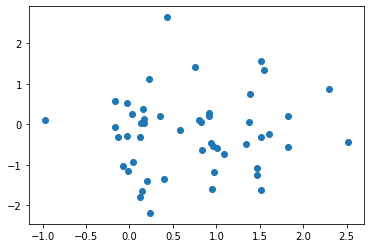

In [11]:
def generate_latent_points(latent_dim,n):
    #generate from a normal law
    latent_points = np.random.randn(latent_dim*n).reshape(n,latent_dim)
    #print(latent_points.shape)
    
    return latent_points

def generate_from_generator(generator,latent_dim,n):
    
    x_input = generate_latent_points(latent_dim,n)
    
    return generator.predict(x_input)
    
def generate_fake_samples(generator,latent_dim,n):
    
    X_fake = generate_from_generator(generator,latent_dim,n)
    
    return X_fake,np.zeros((n,1))
    
    
generator = make_generator(latent_dim)
generated_data = generate_from_generator(generator,latent_dim,50)

#plotting fake samples from untrained generator
plt.scatter(generated_data[:,0],generated_data[:,1])


Right now, our generator is performing very poorly. This is because it has not been trained yet. Once it trains against the discriminator we will approach a distribution that is much closer to the one that we are trying to model

## Training our Generator model

The training of our generator will depend on the performance of the discriminator. When the discriminator performs well (it can detect fake samples), our generator will not be updated  often. conversely, when our discriminator is not good at recognizing fake images, our generator will not be updated as often. This defines the zero-sum advesarial relationship between the two models

We have our two distinct models but we need to find a way to group them together in order to train them as "one" keras model. It turns out that the simplest way to do this is to define a new model that encapsulates the other two. 

from tuto:"Only the discriminator is concerned with distinguishing between real and fake examples; therefore, the discriminator model can be trained in a standalone manner on examples of each.

The generator model is only concerned with the discriminator’s performance on fake examples. Therefore, we will mark all of the layers in the discriminator as not trainable when it is part of the GAN model so that they can not be updated and overtrained on fake examples"

In [12]:
def make_gan(generator,discriminator):
    #we already trained the discriminator previously
    discriminator.trainable = False
    #so we can connect the models
    
    model = Sequential()
    
    model.add(generator)
    model.add(discriminator)
    

    
    model.compile(loss='binary_crossentropy',optimizer='adam')
    return model

In [13]:
discriminator = model
gan_model = make_gan(generator,discriminator)

gan_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 2)                 122       
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


In [14]:
def train_gan(model,latent_dim,n_epochs=10000,batch_size=128):
    for i in range(n_epochs):
        x_gen = generate_latent_points(latent_dim,batch_size)
        
        y_gen = np.ones((batch_size,1)) #b
        
        model.train_on_batch(x_gen,y_gen)
        
        
        

This train function above is still not good as we would only be updating the gen model without ever training the discriminator. and we want both of the models to improve together as their interaction is a kind of game. Therefore we need to include into our final train function a

In [15]:
# full train method that combines discriminator training and generator (gan) training 
def train(gen_model,disc_model,gan_model,latent_dim,n_epochs=10000,batch_size=128):
    half_batch = int(batch_size/2)
    
    for i in range(n_epochs):
        X_real,y_real = generate_real_samples(half_batch)
        X_fake,y_fake = generate_fake_samples(gen_model,latent_dim,half_batch)
        
        disc_model.train_on_batch(X_real,y_real)
        disc_model.train_on_batch(X_fake,y_fake)
        
        X_gan = generate_latent_points(latent_dim,batch_size)
        y_gan = np.ones((batch_size,1))
        
        gan_model.train_on_batch(X_gan,y_gan)
        
        #evaluate
        if i%1000 == 0:
            X_real,y_real = generate_real_samples(half_batch)
            gen_points = generate_from_generator(gen_model, latent_dim, half_batch)
            
            plt.scatter(X_real[:,0],X_real[:,1],color='blue')
            plt.scatter(gen_points[:,0],gen_points[:,1],color='red')
            
            plt.show()

/home/antoine/.local/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


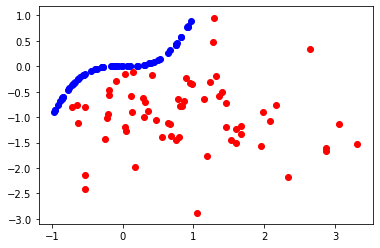

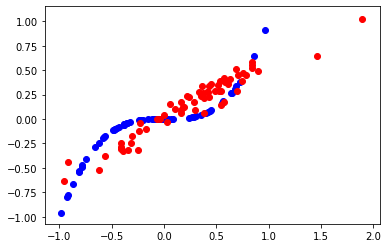

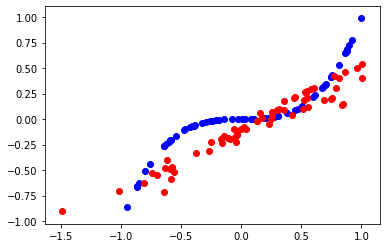

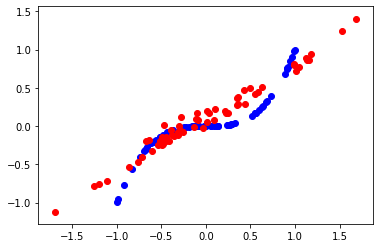

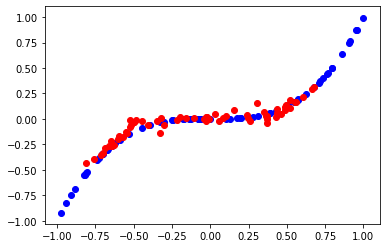

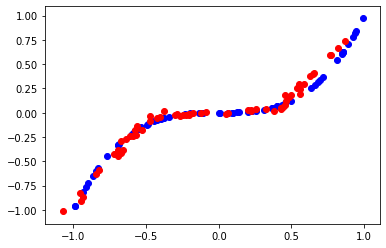

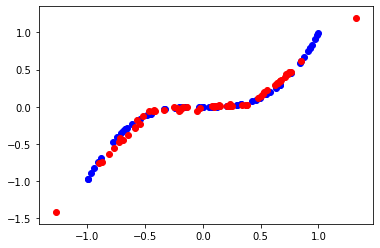

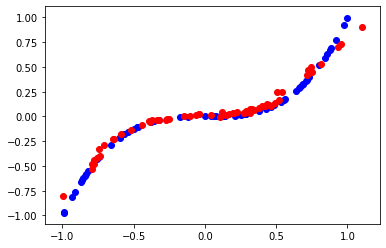

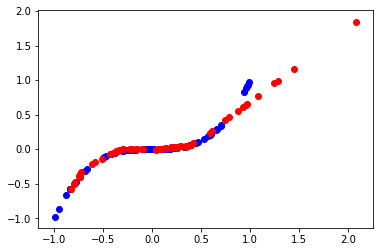

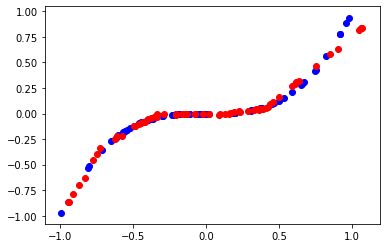

In [16]:
latent_dim=5

generator = make_generator(latent_dim)
discriminator = make_discriminator()
gan = make_gan(generator,discriminator)

train(generator,discriminator,gan,latent_dim)